# Create `2 Gene` simulated datasets using `LineageOT` and evaluate `moslin` couplings

1. Uses LineageOT by ([_Forrow et al., 2021_](https://www.nature.com/articles/s41467-021-25133-1)) of: "bifurcation", "convergent", "partial_convergent", and "mismatched_clusters" trajectories.
2. Computes the couplings using:
    1. LineageOT
    2. OT
    3. GW
    4. moslin
3. Evaluate coupling accuracy.

[[1] Aden Forrow and Geoffrey Schiebinger. "LineageOT is a unified framework for lineage tracing and trajectory inference." Nature communications 12, no. 1 (2021): 1-10.](https://www.nature.com/articles/s41467-021-25133-1)

# Preliminaries

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import run_seeds, method_colors

import moscot as mc

In [2]:
mc.__version__

'0.2.1.dev7+g00b5161'

## Dependencies

Currently, none.

## Set up paths

Define the paths for data and figures

In [3]:
sys.path.insert(0, "../../../")  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, FIG_DIR

FIG_DIR = FIG_DIR / "simulations/forrow_2gene"
DATA_DIR = DATA_DIR / "simulations/forrow_2gene"

# Run simulations

In [4]:
seeds = [
    4698.,
    12102.,
    23860.,
    25295.,
    30139.,
    36489.,
    38128.,
    48022.,
    49142.,
    59706.
]

epsilons = np.logspace(-4, 1, 15)
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 0.95, 0.98, 0.999]

This may take a while, evaluating couplings for all simulations

In [5]:
dfs = {}
for flow_type in ["bifurcation", "convergent", "partial_convergent", "mismatched_clusters"]:
    print(f"running simulation of {flow_type} over {len(seeds)} seeds")
    dfs[flow_type], _, _ = run_seeds(flow_type=flow_type, seeds=seeds, epsilons=epsilons, alphas=alphas, return_res=True)
    

running simulation of bifurcation over 10 seeds
evaluating bifurcation over 15 epsilons and 11 alphas.
    Done!
running simulation of convergent over 10 seeds
evaluating convergent over 15 epsilons and 11 alphas.
    Done!
running simulation of partial_convergent over 10 seeds
evaluating partial_convergent over 15 epsilons and 11 alphas.
    Done!
running simulation of mismatched_clusters over 10 seeds
evaluating mismatched_clusters over 15 epsilons and 11 alphas.
    Done!


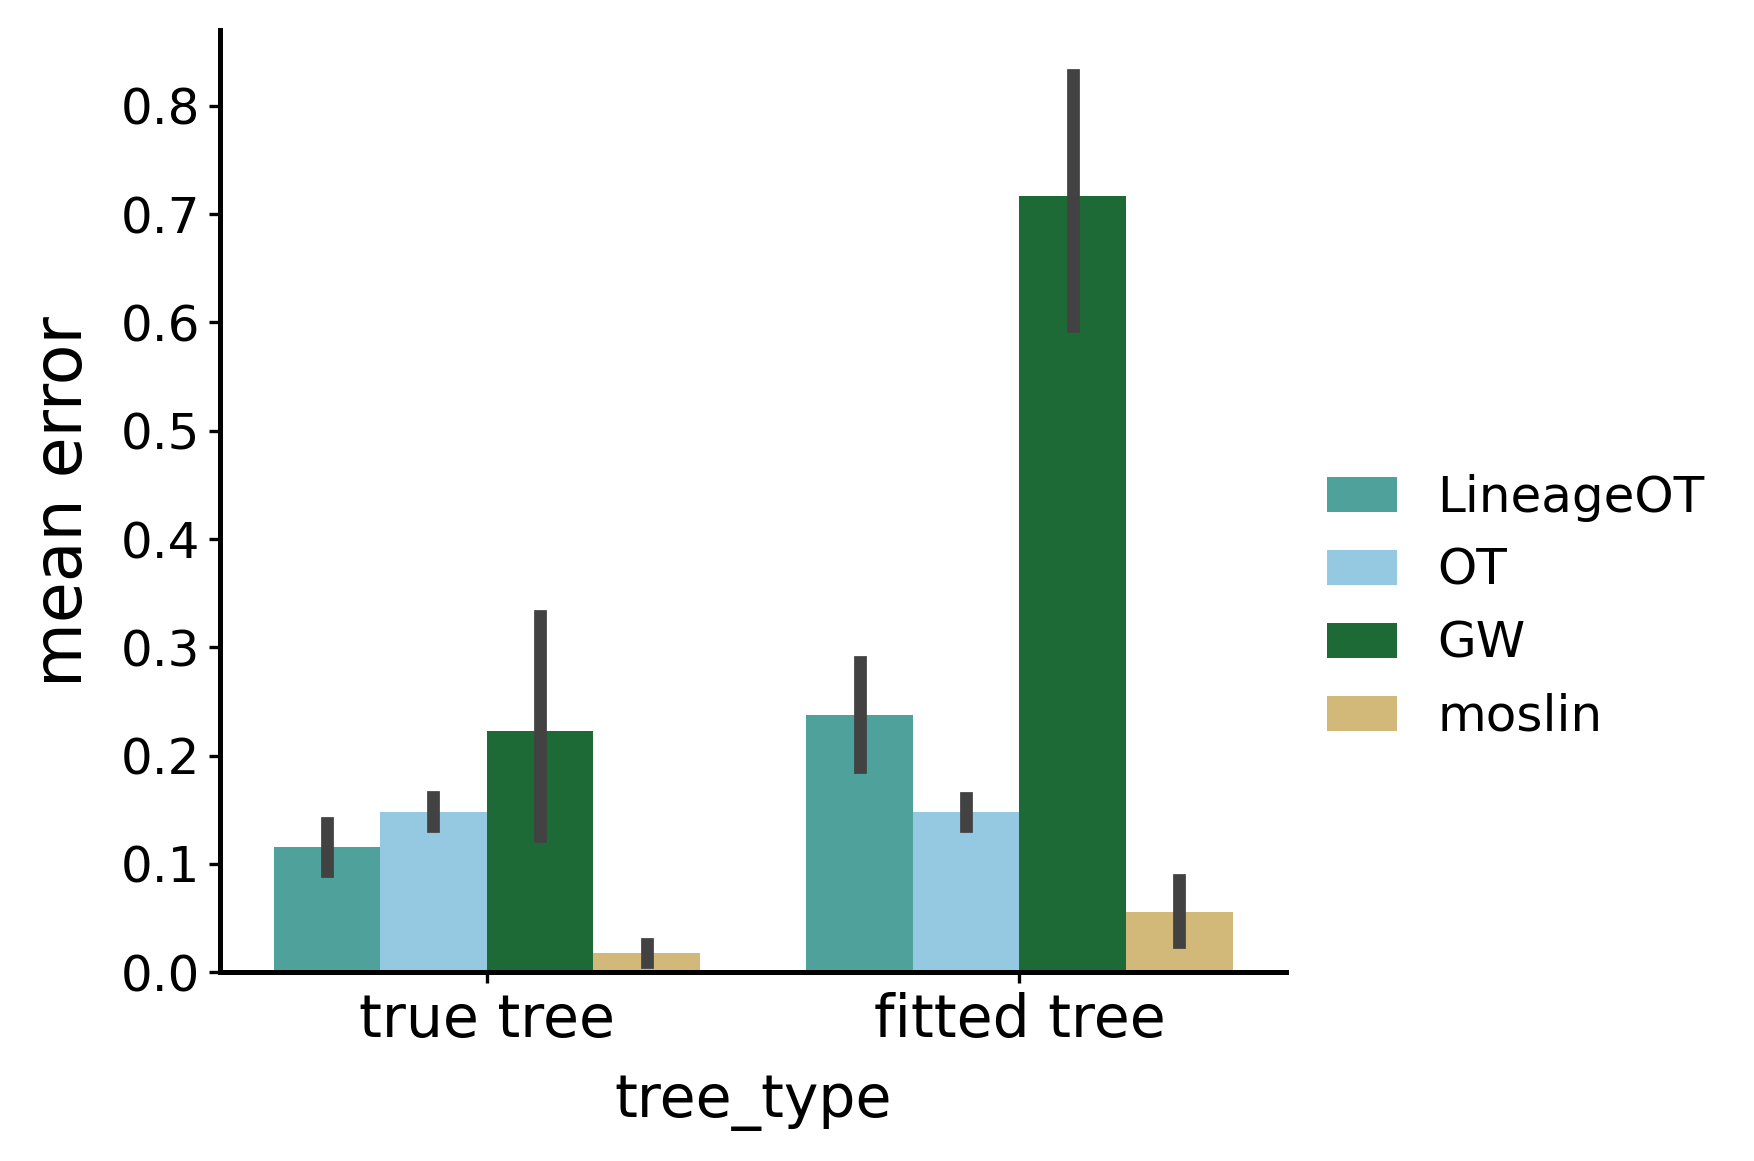

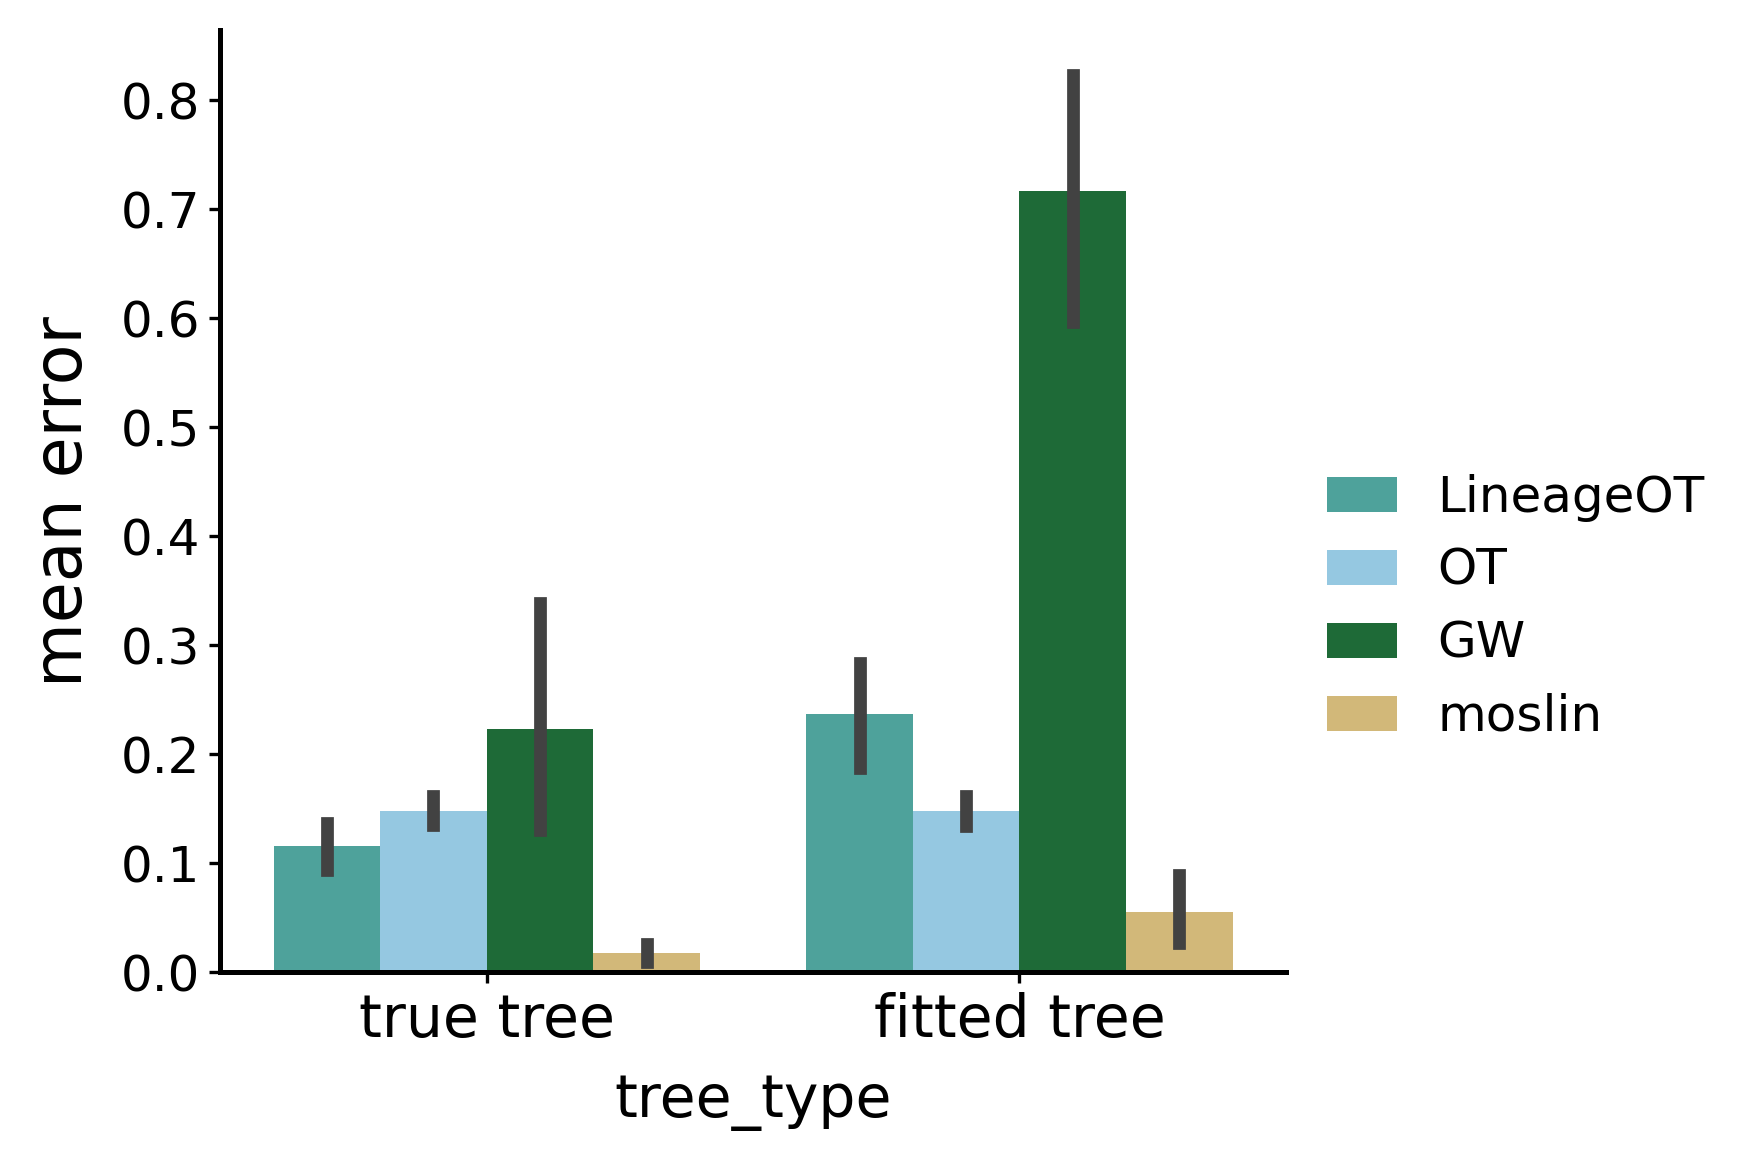

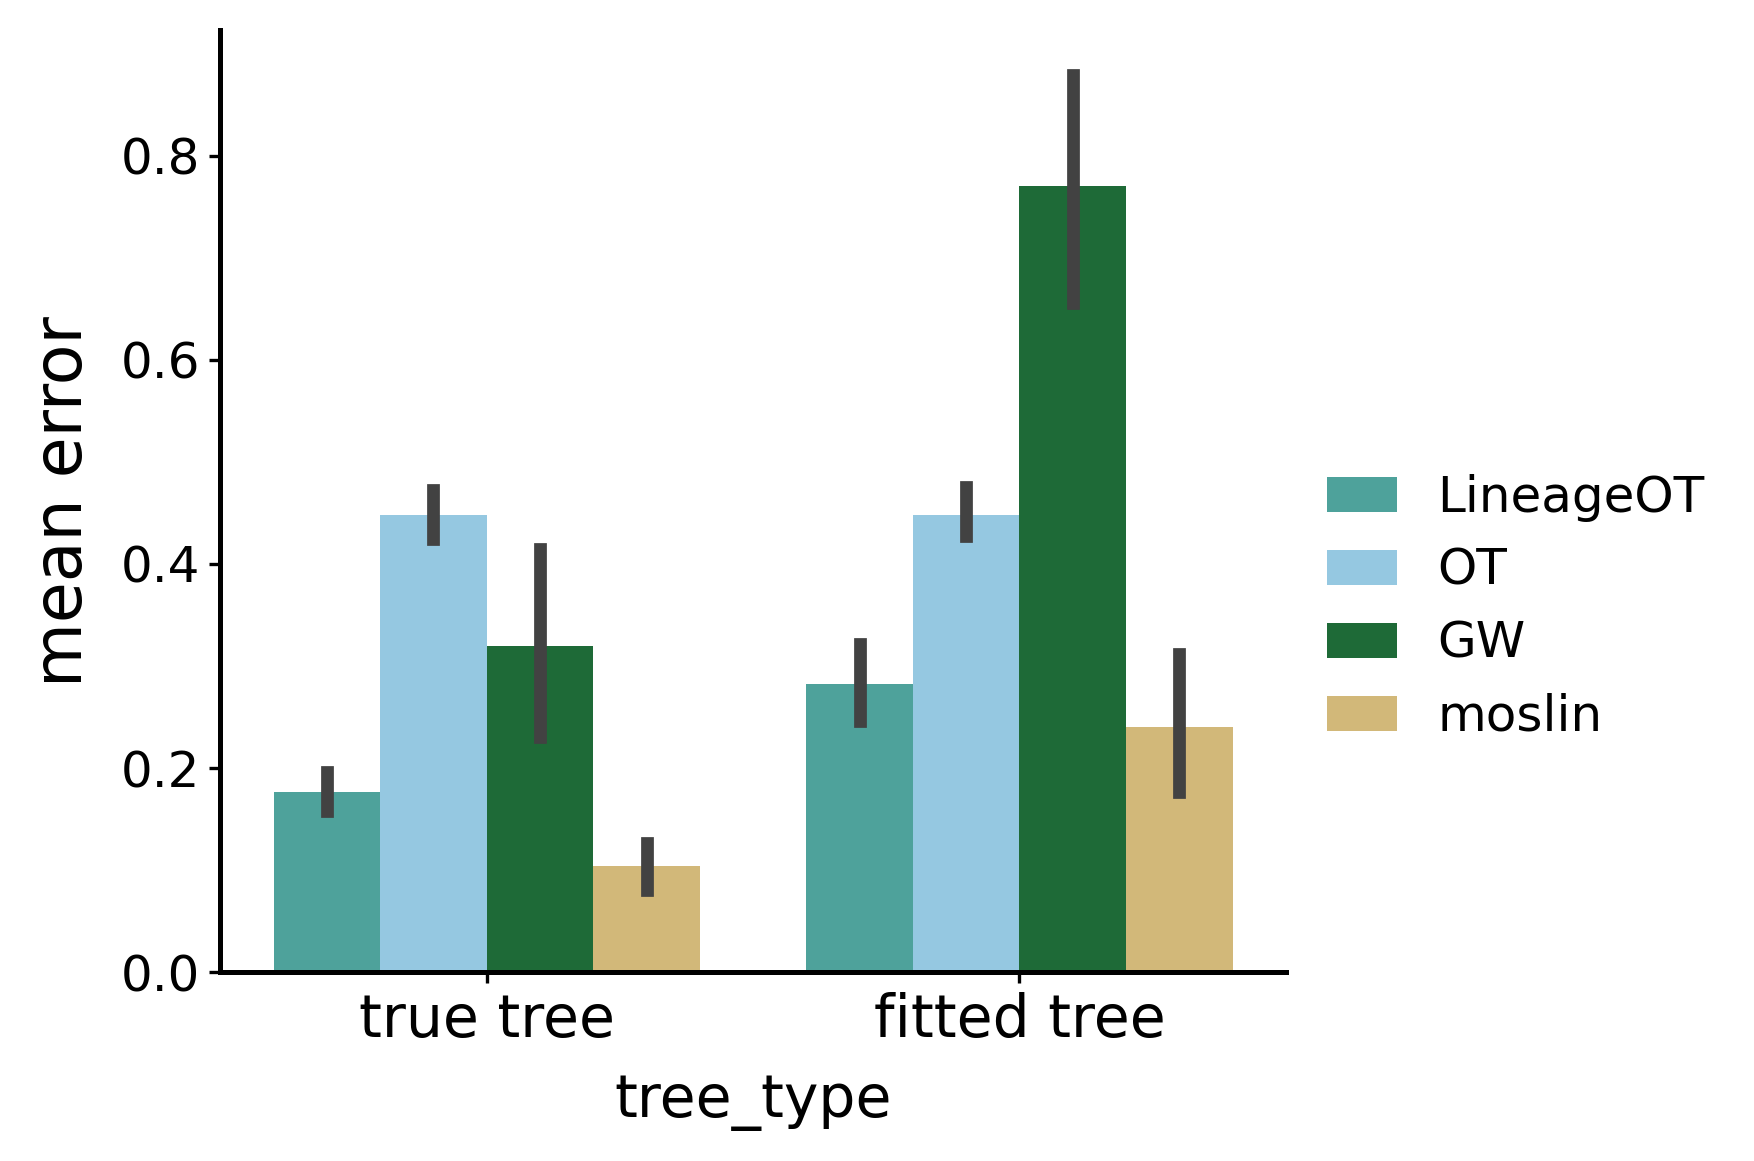

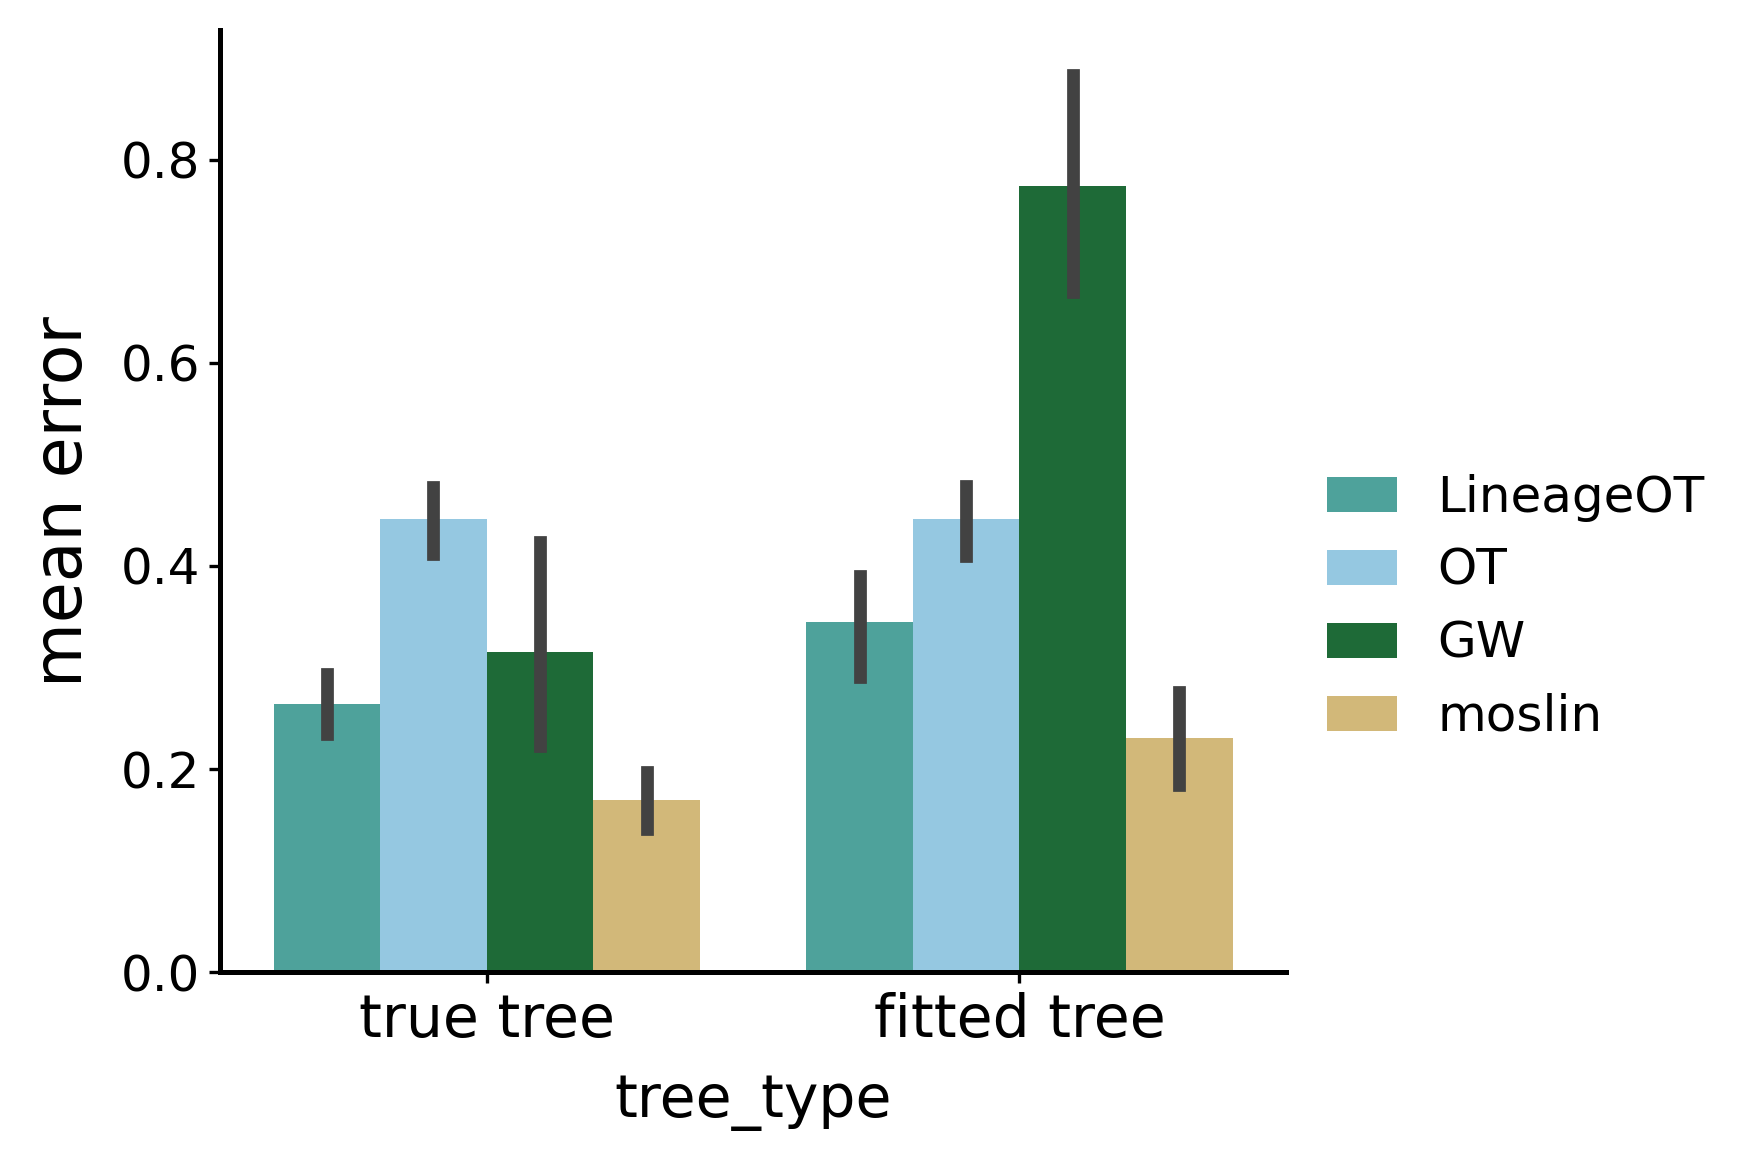

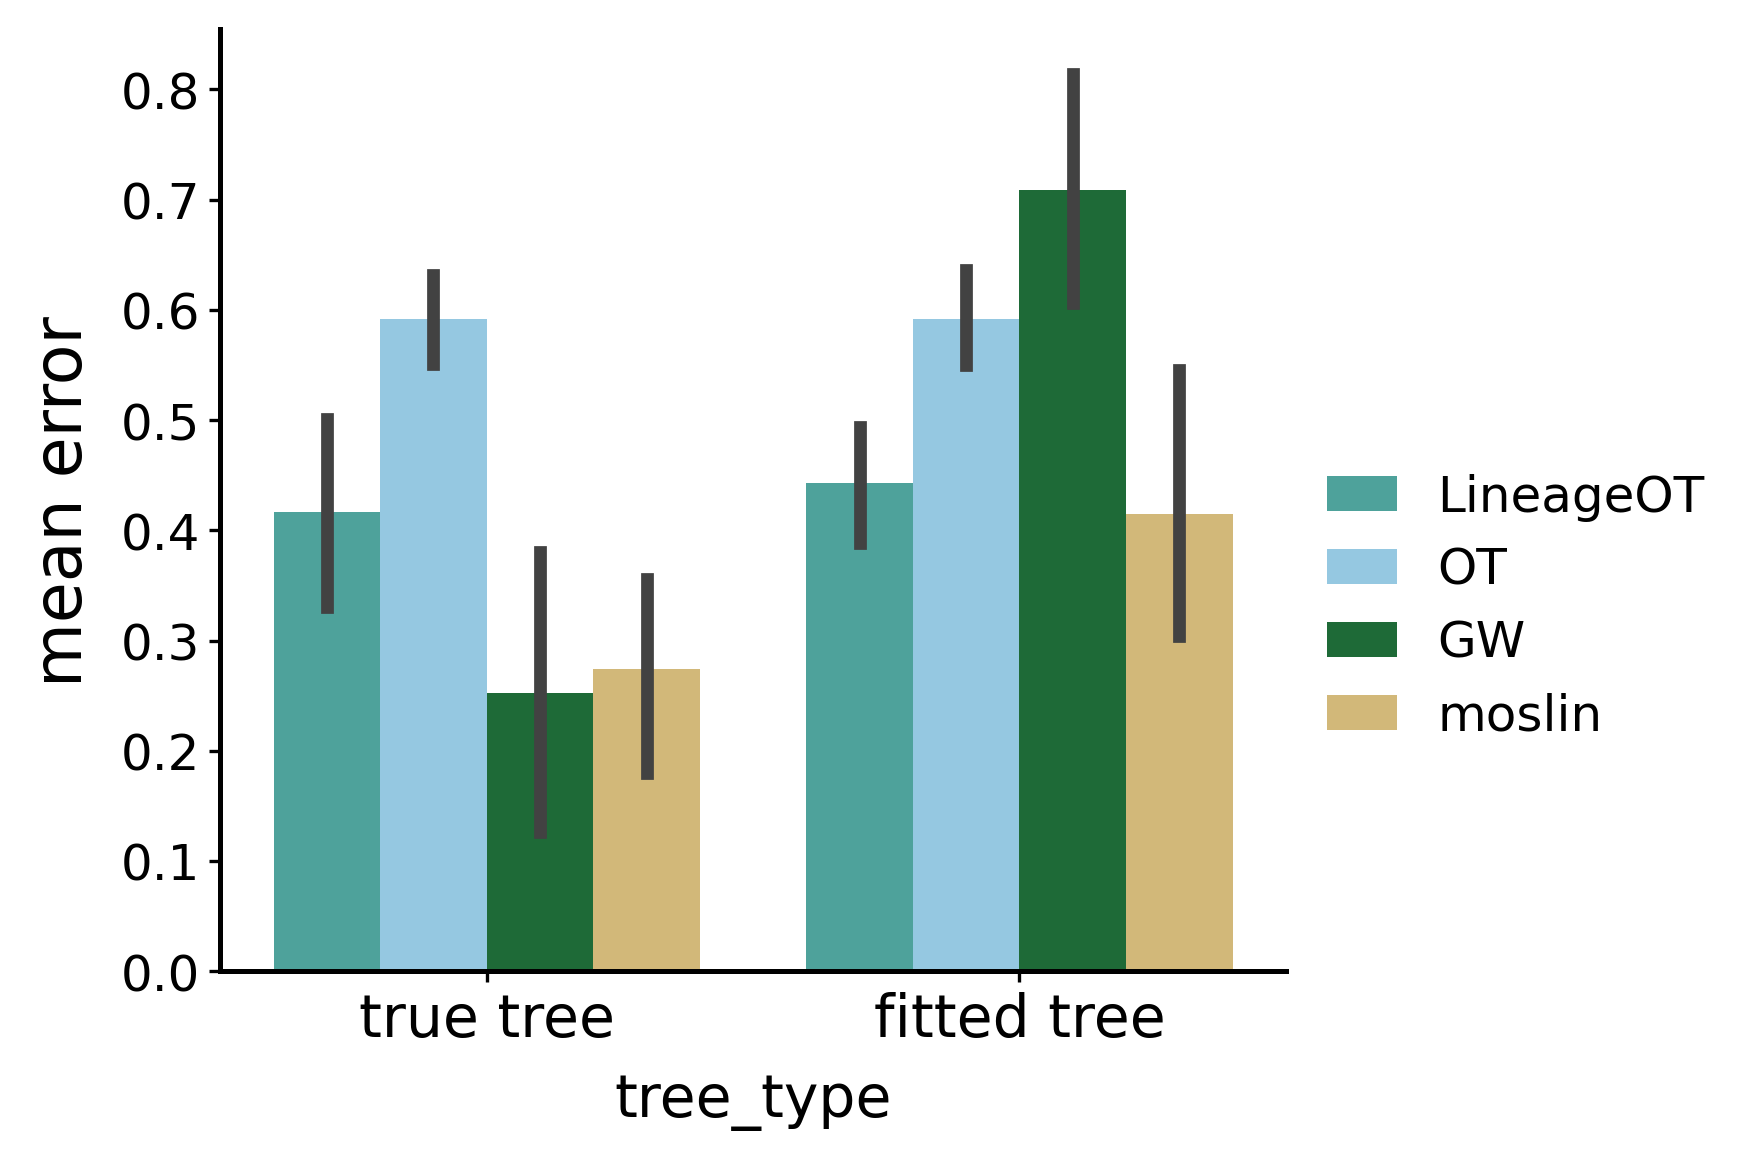

In [8]:
methods = ["LineageOT", "OT", "GW", "moslin"]

for flow_type, df in dfs.items():
    fig, axs = plt.subplots(1, 1, figsize=(6, 4))
    sns.barplot(data=df, x="tree_type", y="mean_error", hue="method", palette=method_colors, ax=axs)
    axs.set_xticklabels(["true tree", "fitted tree"], fontsize=14)
    axs.set_ylabel("mean error", fontsize=16)
    plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"{flow_type}_bar.png", bbox_inches="tight", transparent=True, dpi=300)
    plt.show()

In [9]:
dfm = {}
diffs_true = []
diffs_fitted = []
for flow_type, df in dfs.items():
    dfm[flow_type] = df.groupby(["method", "tree_type"]).mean(["mean_error"]).reset_index()
    val_lineageot = dfm[flow_type][dfm[flow_type]["method"] == "LineageOT"]["mean_error"]
    val_moslin = dfm[flow_type][dfm[flow_type]["method"] == "moslin"]["mean_error"]
    diff = val_lineageot.values - val_moslin.values
    diffs_fitted.append(diff[0])
    diffs_true.append(diff[1])
    print(f"for {flow_type}:")
    print("lineageOT")
    print(val_lineageot.values)
    print("moslin")
    print(val_moslin.values)
    print("diff")
    print(val_lineageot.values - val_moslin.values)

for bifurcation:
lineageOT
[0.23730316 0.11583587]
moslin
[0.0551486  0.01741717]
diff
[0.18215456 0.0984187 ]
for convergent:
lineageOT
[0.2823862  0.17614619]
moslin
[0.2401836  0.10400082]
diff
[0.0422026  0.07214537]
for partial_convergent:
lineageOT
[0.34472156 0.26420271]
moslin
[0.23080707 0.16968965]
diff
[0.11391449 0.09451307]
for mismatched_clusters:
lineageOT
[0.44326748 0.41618153]
moslin
[0.41490313 0.27439003]
diff
[0.02836434 0.1417915 ]


In [10]:
np.mean(diffs_fitted)

0.09165899650139021

In [11]:
np.mean(diffs_true)

0.1017171592419366